Generate the strings to control the matrix so we can quickly verify CA functionality.

 - A - GND
 - B - 1.3 V
 - C - 3.3 V
 - D - Current source (V sense)

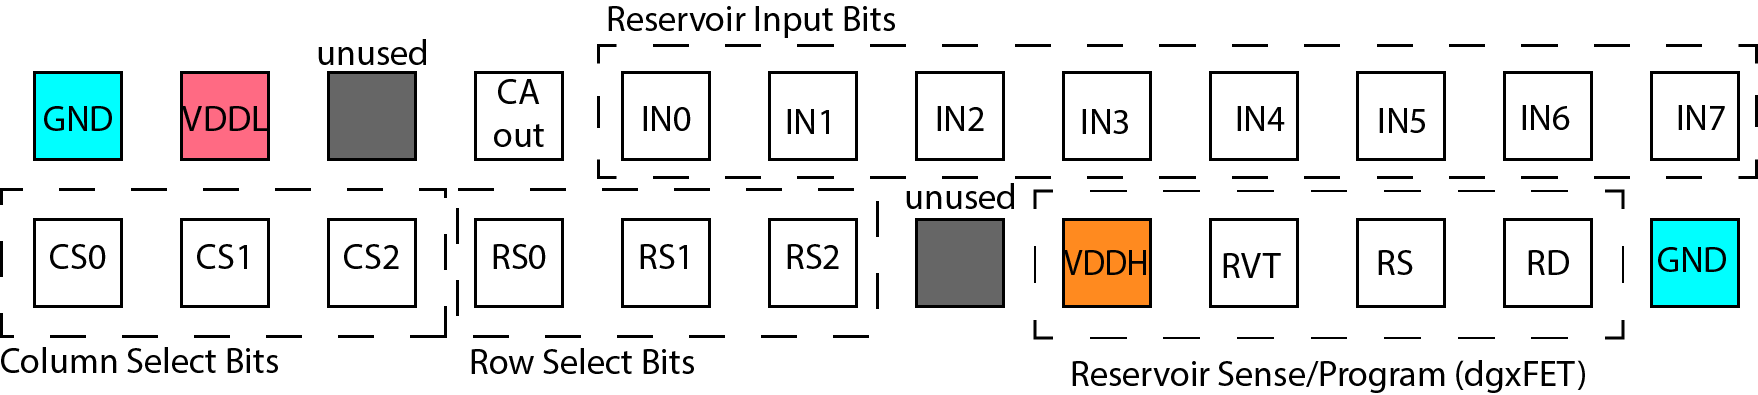

In [14]:
digits(6, base=2, pad=3)

3-element Array{Int64,1}:
 0
 1
 1

In [73]:
for cs in 0:7
    println(reverse(digits(cs, base=2, pad=3)))
end

[0, 0, 0]
[0, 0, 1]
[0, 1, 0]
[0, 1, 1]
[1, 0, 0]
[1, 0, 1]
[1, 1, 0]
[1, 1, 1]


In [76]:
function generate_config(input::Array{<:Union{Int,Bool},1}, rs::Int, cs::Int)
    if !(cs in 0:7)
        error("Column needs to be in [0,7].")
    end
    
    if !(rs in 0:7)
        error("Row needs to be in [0,7].")
    end
    
    if length(input) != 8
        error("Need 8-bit input.")
    end
    
    int_to_bool = x->convert(Array{Bool,1},x)
    
    if typeof(input[1]) <: Int
        input = int_to_bool(input)
    end
    
    cs_b = int_to_bool(digits(cs, base=2, pad=3))
    rs_b = int_to_bool(digits(rs, base=2, pad=3))
    
    #wire GND, R-D, R-S, RVT, VDDH, unwired"
    config = "A, A, A, C, C, A, "
    
    #set the column selected
    for (i,x) in enumerate(cs_b)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end
    
    #set the row selected
    for (i,x) in enumerate(rs_b)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end
    
    #wire GND, VDDL, unused, CA-O
    
    config *= "A, B, A, D, "
    
    #set the bit input
    for (i,x) in enumerate(input)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end

    config = config[1:end-2]
    
    return config
    
end

generate_config (generic function with 2 methods)

In [68]:
test = generate_config([1,0,0,0, 1,0,0,0], 1, 1)

"A, A, A, C, C, A, A, A, B, A, A, B, A, B, A, D, B, A, A, A, B, A, A, A"

In [69]:
test = generate_config([0,0,0,0, 0,0,0,0], 0, 0)

"A, A, A, C, C, A, A, A, A, A, A, A, A, B, A, D, A, A, A, A, A, A, A, A"

In [33]:
length(test)

47

Generate 56 lines to readout the entire CA state & verify

In [91]:
for r in 1:7, c in 0:7
    println(generate_config([1,0,0,0, 0,0,0,0], r, c))
end

A, A, A, C, C, A, A, A, A, B, A, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, A, A, B, A, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, B, A, B, A, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, B, A, B, A, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, A, B, B, A, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, A, B, B, A, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, B, B, B, A, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, B, B, B, A, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, A, A, A, B, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, A, A, A, B, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, B, A, A, B, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, B, A, A, B, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, A, B, A, B, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, A, B, A, B, A, A, B, A, D, B, A, A, A, A, A, A, A
A, A, 

# Memristor Program Generator

 - A - 0.0 V - GND
 - B - 1.2 V - VDDL
 - C - 3.3 V - VDDH
 - D - 1.2 V - RVT (memristor programming threshold)
 - E - 0.3 V - RSRC (Current Sense)
 - F - 0.0 V - RDRN (Memristor Ground)
 - G - 0.0 A - VSENSE (Logic Read)

In [1]:
function generate_config2(input::Array{<:Union{Int,Bool},1}, rs::Int, cs::Int)
    if !(cs in 0:7)
        error("Column needs to be in [0,7].")
    end
    
    if !(rs in 0:7)
        error("Row needs to be in [0,7].")
    end
    
    if length(input) != 8
        error("Need 8-bit input.")
    end
    
    int_to_bool = x->convert(Array{Bool,1},x)
    
    if typeof(input[1]) <: Int
        input = int_to_bool(input)
    end
    
    cs_b = int_to_bool(digits(cs, base=2, pad=3))
    rs_b = int_to_bool(digits(rs, base=2, pad=3))
    
    #wire GND, R-D, R-S, RVT, VDDH, unwired"
    config = "A, A, A, C, C, A, "
    
    #set the column selected
    for (i,x) in enumerate(cs_b)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end
    
    #set the row selected
    for (i,x) in enumerate(rs_b)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end
    
    #wire GND, VDDL, unused, CA-O
    
    config *= "A, B, A, G, "
    
    #set the bit input
    for (i,x) in enumerate(input)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end

    config = config[1:end-2]
    
    return config
    
end

generate_config2 (generic function with 1 method)

def reservoirComp(self, test):

        Chns = [1,2,3,4,5,6,7]
        VorI = [True, True, True, True,  True, True, False]
        VVal = [0, 1.2, 3.3, 1.2,  0.3, 0.0, 0.0]
        IVal = [0,0,0,0, 0,0,0]
        IComp = [1e-3,1e-3,1e-3,1e-3, 1e-3,1e-3,1e-3]
        Typ = 'SpotMeas'
        
        MeasType = 'reservoirComputing'

        ret1 = self.E5274A.SpotMeasurement(Chns, VorI, VVal, IVal, IComp=IComp)
    
        MC = std.MatrixChange(self.Instruments.getMatrixInstrument(), self.Configuration.getMatrixConfiguration(), True)

        ret = []
        n = 0
        while MC.setNext():

            stop = False
            while not self.Stop.empty():
                stop = self.Stop.get()
            
            if stop:
                break
            
            out = self.E5274A.SpotMeasurement(Chns, VorI, VVal, IVal, IComp=IComp)

            ret.append([i[0] for i in out['Data']])

            Trac = ret[-1][0:3]
            self.IVplotData.put({"Add": True, "lineStyle": 'o', 'legend': ['GND', 'Vlow', 'Vhigh'], "lineWidth":0.5, 'Yscale': 'log',  "Traces":Trac, 'Xaxis': False, 'Xlabel': "Matrix Iteration", "Ylabel": 'current (A)', 'Title': "input current", "MeasurementType": Typ, "ValueName": 'Current'})

            Trac = ret[-1][3]
            self.IVplotData.put({"Add": True, "lineStyle": 'o', "lineWidth":0.5, 'Yscale': 'lin',  "Traces":Trac, 'Xaxis': False, 'Xlabel': 'Matrix Iteration', "Ylabel": 'voltage (V)', 'Title': "output voltage", "MeasurementType": Typ, "ValueName": 'voltage'})
            n = n+1

        header = out['Header']
        
        header.insert(0,"TestParameter,Measurement.Type,%s" %(MeasType))
        header.append("Measurement,Device,%s" %(self.device))
        header.append("Measurement,Time,%s" %(tm.strftime("%Y-%m-%d_%H-%M-%S",self.localtime)))
        
        header.append('DataName, Ignd, Ivddl, Ivddh, Ivtr, Isrc, Idrn, Vsense')
        header.append('Dimension, %d, %d, %d, %d, %d, %d, %d' %(n,n,n,n,n,n,n))

        out = []
        for i in ret:
            add = 'DataValue'
            for x in i: 
                add = "%s, %s" %(add, x)
            out.append(add)
            
        self.threads.append(th.Thread(target = std.writeDataToFile , args=(header, out, self.getFolder(), self.getFilename(Typ))))
        self.threads[len(self.threads)-1].start()

In [3]:
println(generate_config2(zeros(Int64,8), 0,0))

A, A, A, C, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, A, A, A


In [137]:
for r in 1:7, c in 0:7
    println(generate_config2([1,0,0,0, 0,0,0,0], r, c))
end

A, A, A, C, C, A, A, A, A, B, A, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, A, A, B, A, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, B, A, B, A, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, B, A, B, A, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, A, B, B, A, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, A, B, B, A, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, B, B, B, A, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, B, B, B, A, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, A, A, A, B, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, A, A, A, B, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, B, A, A, B, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, B, A, A, B, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, A, A, B, A, B, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, A, C, C, A, B, A, B, A, B, A, A, B, A, G, B, A, A, A, A, A, A, A
A, A, 

In [150]:
function generate_forming_program(rs::Int, cs::Int)
    if !(cs in 0:7)
        error("Column needs to be in [0,7].")
    end
    
    if !(rs in 0:7)
        error("Row needs to be in [0,7].")
    end
    
    input = zeros(Int, 8)
    int_to_bool = x->convert(Array{Bool,1},x)
    
    if typeof(input[1]) <: Int
        input = int_to_bool(input)
    end
    
    cs_b = int_to_bool(digits(cs, base=2, pad=3))
    rs_b = int_to_bool(digits(rs, base=2, pad=3))
    
    #wire GND, R-D, R-S, RVT, VDDH, unwired"
    config = "A, F, C, B, C, A, "
    
    #set the column selected
    for (i,x) in enumerate(cs_b)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end
    
    #set the row selected
    for (i,x) in enumerate(rs_b)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end
    
    #wire GND, VDDL, unused, CA-O
    
    config *= "A, B, A, G, "
    
    #set the bit input
    for (i,x) in enumerate(input)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end

    config = config[1:end-2]
    
    return config
    
end

generate_forming_program (generic function with 2 methods)

In [151]:
function generate_read(input::Union{Array{<:Union{Bool,Int},1},BitArray}, rs::Int, cs::Int)    
    if length(input) != 8
        error("Need 8-bit input.")
    end
    
    if !(cs in 0:7)
        error("Column needs to be in [0,7].")
    end
    
    if !(rs in 0:7)
        error("Row needs to be in [0,7].")
    end
    
    int_to_bool = x->convert(Array{Bool,1},x)
    
    if typeof(input[1]) <: Int
        input = int_to_bool(input)
    end
    
    cs_b = int_to_bool(digits(cs, base=2, pad=3))
    rs_b = int_to_bool(digits(rs, base=2, pad=3))
    
    #wire GND, R-D, R-S, RVT, VDDH, unwired"
    config = "A, F, E, C, C, A, "
    
    #set the column selected
    for (i,x) in enumerate(cs_b)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end
    
    #set the row selected
    for (i,x) in enumerate(rs_b)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end
    
    #wire GND, VDDL, unused, CA-O
    
    config *= "A, B, A, G, "
    
    #set the bit input
    for (i,x) in enumerate(input)
        if x
            config *= "B, "
        else
            config *= "A, "
        end
    end

    config = config[1:end-2]
    
    return config
    
end

function generate_memristor_read(i::Int, j::Int)
    return generate_read(zeros(Int,8),i,j)
end

function generate_reservoir_read(input::Union{Array{<:Union{Bool,Int},1},BitArray})
    return generate_read(input,0,0)
end

generate_reservoir_read (generic function with 1 method)

In [139]:
generate_forming_program(2,2)

"A, F, C, D, C, A, A, B, A, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A"

In [154]:
println(generate_forming_program(7,7))
println(generate_memristor_read(7,7))

A, F, C, B, C, A, B, B, B, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, B, B, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A


In [158]:
for i in 1:7, j in 0:7
    println(generate_memristor_read(i,j))
end

A, F, E, C, C, A, A, A, A, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, A, A, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, A, B, A, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, B, A, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, A, A, B, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, A, B, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, A, B, B, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, B, B, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, A, A, A, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, A, A, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, A, B, A, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, B, A, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, A, A, B, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, A, B, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, 

In [146]:
for i in 0:7
    println(generate_forming_program(7,i))
    println(generate_memristor_read(7,i))
end

A, F, C, B, C, A, A, A, A, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, D, C, A, A, A, A, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, B, A, A, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, D, C, A, B, A, A, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, A, B, A, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, D, C, A, A, B, A, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, B, B, A, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, D, C, A, B, B, A, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, A, A, B, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, D, C, A, A, A, B, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, B, A, B, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, D, C, A, B, A, B, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, A, B, B, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, D, C, A, A, B, B, B, B, B, A, B, A, G, A, A, A, A, A, A, A, A
A, F, 

In [127]:
generate_single_read(zeros(Int,8),0,0)

"A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, A, A, A"

In [128]:
generate_reservoir_read(ones(Int,8))

"A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, B, B, B, B, B, B, B"

In [113]:
in0 = zeros(Int,8)

8-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0

In [110]:
in1 = reverse(digits(1,base=2,pad=8))

8-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 1

In [112]:
in2 = reverse(digits(2,base=2,pad=8))

8-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 1
 0

In [157]:
for input in [in0, in1, in2]
    println(generate_reservoir_read(input))
end

A, F, E, C, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, A, A, B
A, F, E, C, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, A, B, A


In [147]:
for input in [reverse(digits(x, base=2, pad=8)) for x in 0:255]
    println(generate_reservoir_read(input))
end

A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, A, A, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, A, B, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, A, B, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, B, A, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, B, A, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, B, B, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, A, B, B, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, B, A, A, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, B, A, A, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, B, A, B, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, B, A, B, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, B, B, A, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, A, A, A, A, B, B, A, B
A, F, 

A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, A, A, A, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, A, A, B, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, A, A, B, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, A, B, A, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, A, B, A, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, A, B, B, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, A, B, B, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, B, A, A, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, B, A, A, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, B, A, B, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, B, A, B, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, B, B, A, A
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, B, B, A, B
A, F, E, D, C, A, A, A, A, A, A, A, A, B, A, G, B, A, A, B, B, B, B, A
A, F, 

In [108]:
generate_read_program(ones(Int,8),2,2)

"A, A, E, D, C, A, A, B, A, A, B, A, A, B, A, F, B, B, B, B, B, B, B, B"

Rule 60 XOR program locations

xor_R[2,2] = 4000
xor_R[1,3] = 4000
xor_R[4,4] = 4000
xor_R[2,5] = 4000
xor_R[3,6] = 4000
xor_R[3,7] = 4000

In [88]:
locations_1index = [2 2; 1 3; 4 4; 2 5; 3 6; 3 7]

6×2 Array{Int64,2}:
 2  2
 1  3
 4  4
 2  5
 3  6
 3  7

In [89]:
locations = locations_1index .- 1

6×2 Array{Int64,2}:
 1  1
 0  2
 3  3
 1  4
 2  5
 2  6

In [156]:
for i in 1:size(locations,1)
    loc = locations[i,:]
    println(generate_forming_program(loc[1], loc[2]))
    println(generate_memristor_read(loc[1], loc[2]))
end

A, F, C, B, C, A, B, A, A, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, A, A, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, A, B, A, A, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, A, B, A, A, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, B, B, A, B, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, B, A, B, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, A, A, B, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, A, A, B, B, A, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, B, A, B, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, B, A, B, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, C, B, C, A, A, B, B, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A
A, F, E, C, C, A, A, B, B, A, B, A, A, B, A, G, A, A, A, A, A, A, A, A
